# ISPR Midterm 2 Assignment 3
## Alessandro Bucci MAT. 638619

Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.     Reconstruct the original test images from their hidden encoding and confront the reconstructions with the original image (use a suitable quantitative metric to assess the reconstraction quality and also choose few examples to confront visually).

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.utils import gen_batches
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np


### Loading MNIST

In [2]:
x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

x /= 255
x = (x > 0.5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000)

c:\Users\Kaos1\mambaforge\envs\ispr_mid2_2023\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def get_image(image_index, dataset):
    try:
        return dataset[image_index,:].reshape(28,28) 
    except:
        return None
    
def get_single_number_dataset(number, x, y_str):
    Y = np.array([int(y) for y in y_str])
    return x[Y == number] if np.abs(number) <= 9 else None 


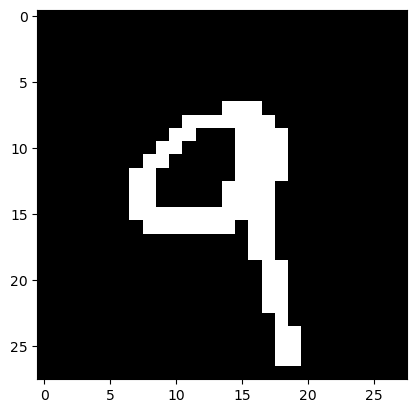

In [4]:
x = get_single_number_dataset(9, x_train, y_train)

for i in range(2):
    plt.imshow(x[i,:].reshape(28,28), cmap='gray')
    #plt.show() # Show the image

In [5]:
class RBM():

	def __init__(self, visible_dim, hidden_dim):
		self.visible_dim = visible_dim
		self.hidden_dim = hidden_dim
		# weights
		self.W = np.random.randn(visible_dim, hidden_dim)
		# biases
		self.bh = np.random.randn(hidden_dim)
		self.bv = np.random.randn(visible_dim)
    
  
	def fit(self, X, epochs=20, batch_dim=32, lr=0.1):

		for epoch in range(epochs):

			error_epoch = 0
			batches = list(gen_batches(X.shape[0], batch_dim))
			
			for batch in batches:
				batch = X[batch.start:batch.stop]
				batch_size = batch.shape[0]

				# Wake - P(h|v)
				ones_poshidP = np.ones((batch_size, self.hidden_dim))
				poshidP = ones_poshidP/(ones_poshidP + np.exp(-np.dot(batch,self.W) - self.bh))
				wake = np.dot(batch.T, poshidP)

				# Dream - P(v|h)
				ones_reconDataP = np.ones((batch_size, self.visible_dim))
				reconDataP = ones_reconDataP / (ones_reconDataP + np.exp(-np.dot(poshidP, np.transpose(self.W))-self.bv))
				ones_neghidP = np.ones((batch_size, self.hidden_dim))
				neghidP = ones_neghidP / (ones_neghidP + np.exp(-np.dot(reconDataP, self.W) - self.bh))
				dream = np.dot(np.transpose(reconDataP), neghidP)

				# Reconstruction error
				error = np.sum((batch-reconDataP)**2)/batch_size

				# Update CD-1
				self.W += lr*(wake-dream)/batch_size
				self.bh += lr*(np.sum(poshidP-neghidP, axis=0))/batch_size
				self.bv += lr*(np.sum(batch-reconDataP, axis=0))/batch_size

				error_epoch += error

			error_epoch /= len(batches)
			print(f"epoch: {epoch} error: {error_epoch}")

	def reconstruct(self, X): 

		ones_poshidP = np.ones((X.shape[0], self.hidden_dim))
		poshidP = ones_poshidP/(ones_poshidP + np.exp(-np.dot(X,self.W)-self.bh))
		poshidS = poshidP > np.random.uniform(size=poshidP.shape)
		
		ones_reconDataP = np.ones((X.shape[0], self.visible_dim))
		reconDataP = ones_reconDataP / (ones_reconDataP + np.exp(-np.dot(poshidS,np.transpose(self.W))-self.bv))

		return reconDataP
	
	def encode(self, X):
		ones_poshidP = np.ones((X.shape[0], self.hidden_dim))
		poshidP = ones_poshidP/(ones_poshidP + np.exp(-np.dot(X,self.W)-self.bh))

		return poshidP

Training the RBM

In [11]:
rbm = RBM(x_train.shape[1], 25)
rbm.fit(x_train, epochs=30, batch_dim=16, lr=0.5)

epoch: 0 error: 46.07044726179787
epoch: 1 error: 42.439838481776285
epoch: 2 error: 41.68859938876622
epoch: 3 error: 41.244609437539346
epoch: 4 error: 40.70678166354018
epoch: 5 error: 40.179137008352406
epoch: 6 error: 39.68187283102255
epoch: 7 error: 39.1025340818655
epoch: 8 error: 38.53563454487251
epoch: 9 error: 38.05197644487498
epoch: 10 error: 37.78832977912438
epoch: 11 error: 37.65257936651002
epoch: 12 error: 37.65170427358154
epoch: 13 error: 37.776051541263726
epoch: 14 error: 37.8473913487494
epoch: 15 error: 37.826541310269235
epoch: 16 error: 37.660568946432925
epoch: 17 error: 37.627396796823135
epoch: 18 error: 37.60063124404054
epoch: 19 error: 37.53465237907602
epoch: 20 error: 37.39073898486891
epoch: 21 error: 37.33668167159109
epoch: 22 error: 37.270001373683414
epoch: 23 error: 37.18025256904954
epoch: 24 error: 37.11216055860163
epoch: 25 error: 37.16169994571612
epoch: 26 error: 37.13770586482786
epoch: 27 error: 37.11353816016479
epoch: 28 error: 37.0553

### Encoding
first we construct the dataset comprised of one digit per type

In [7]:
x_sample = list()

for i in range(10):
    x = get_single_number_dataset(i, x_train, y_train)
    x_sample.append(x[i,:])

x_sample = np.array(x_sample)

plotting the sample set:

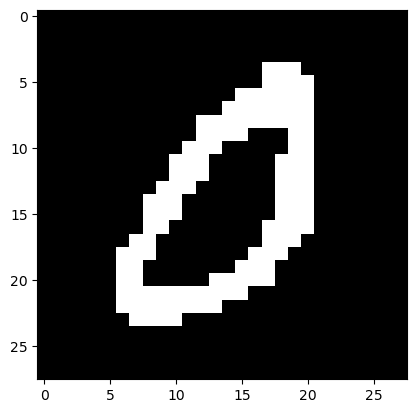

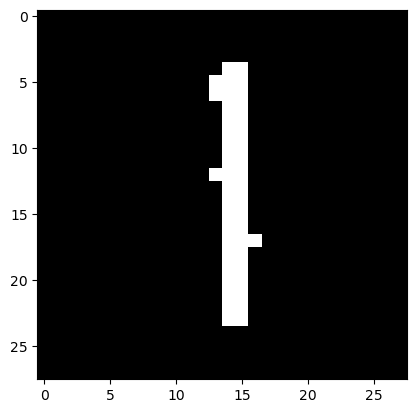

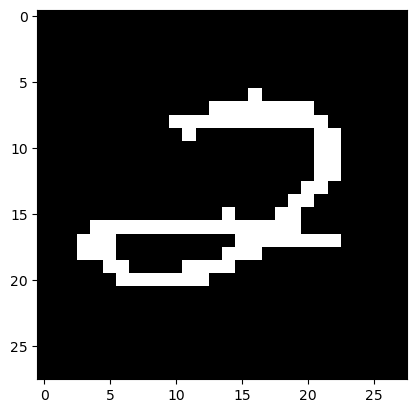

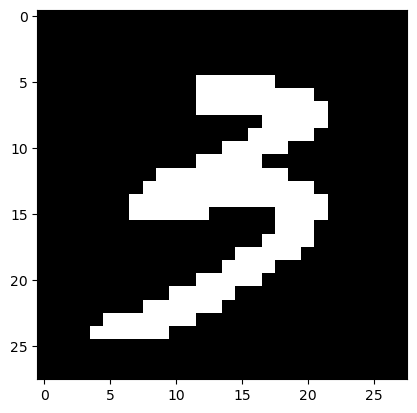

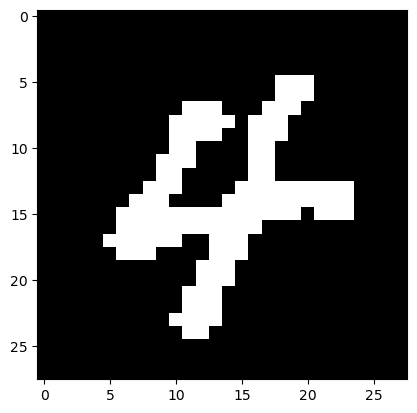

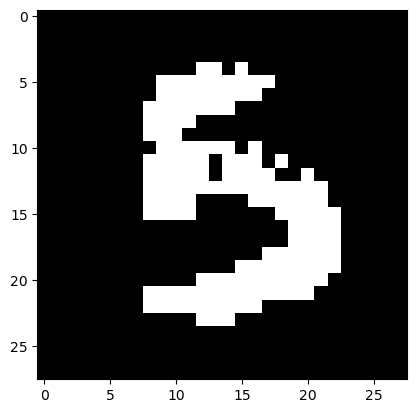

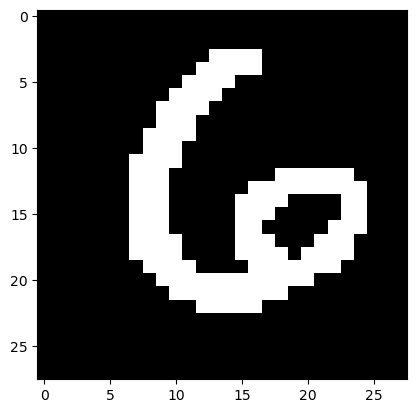

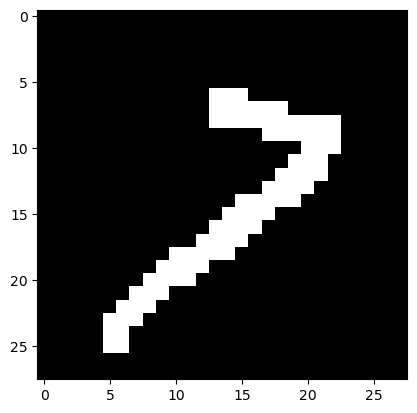

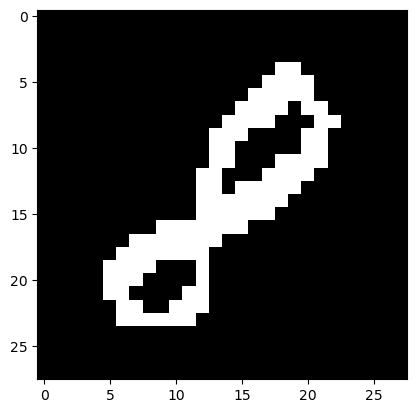

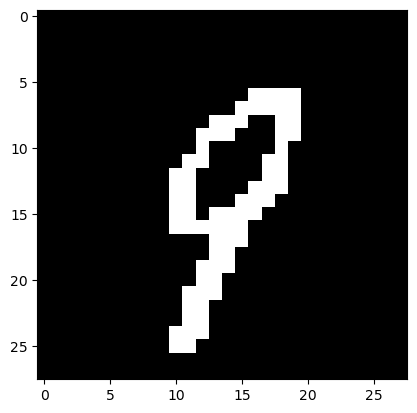

In [8]:
for i in range(10):
    plt.imshow(x_sample[i].reshape(28,28), cmap='gray')
    plt.show()

Plotting their enconding (I have chosen 25 as the number of hidden neuron to plot an image to compare to the original, hoping it could be meaningful)

In [12]:
x_sample_encoded = rbm.encode(x_sample)

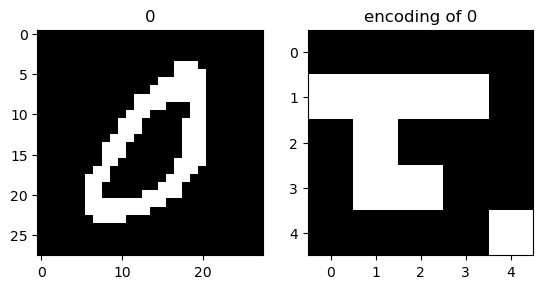

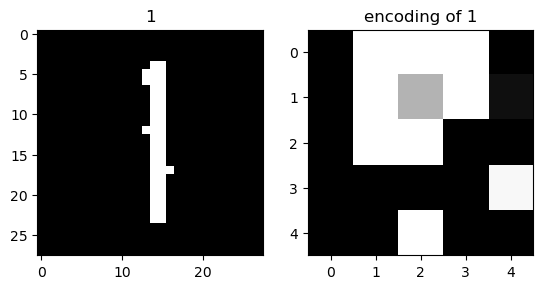

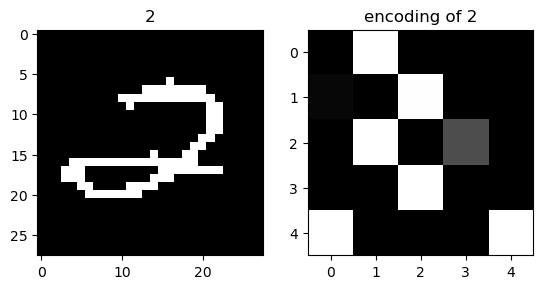

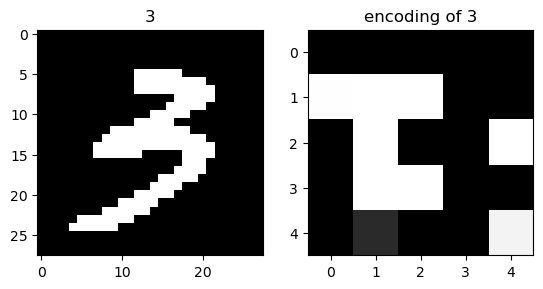

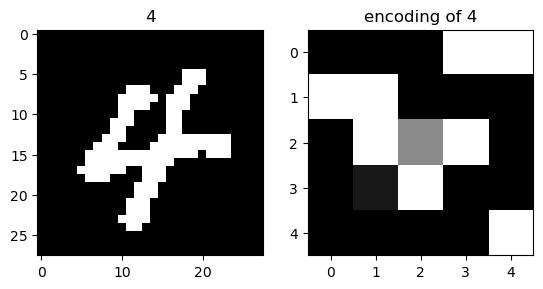

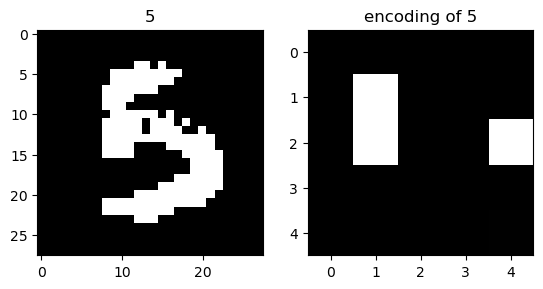

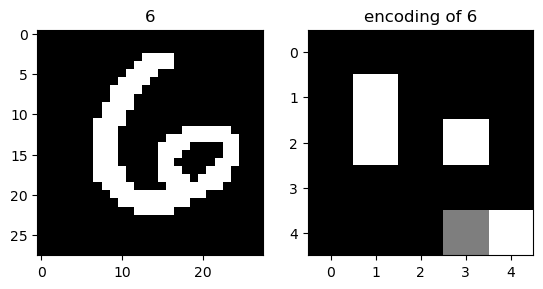

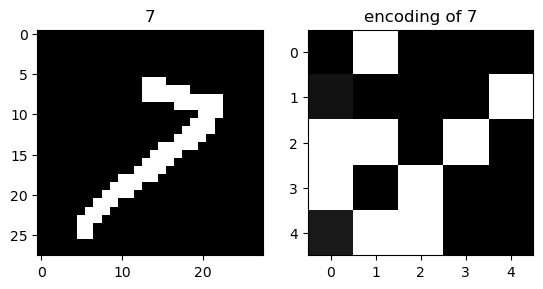

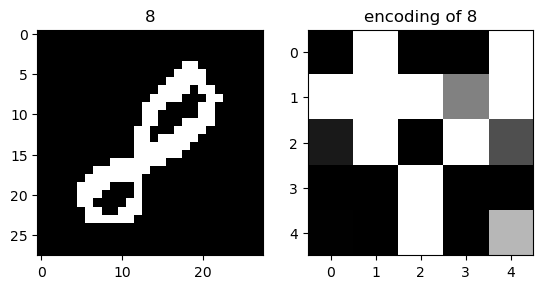

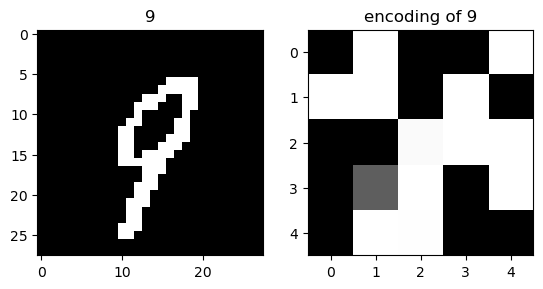

In [19]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(i)
    ax2.set_title("encoding of "+ str(i))
    ax1.imshow(x_sample[i].reshape(28,28), cmap='gray')
    ax2.imshow(x_sample_encoded[i].reshape(5,5), cmap='gray')
    plt.show()

Although there is anything meaningful that emerged in these representations, it can be noted that the enconding of 5 and 6 are very similar, probably because they share the curves and part of the shapes.

### Reconstruction
Now we will proceed with the reconstruction of the same sample dataset:

In [20]:
x_sample_encoded = rbm.reconstruct(x_sample)

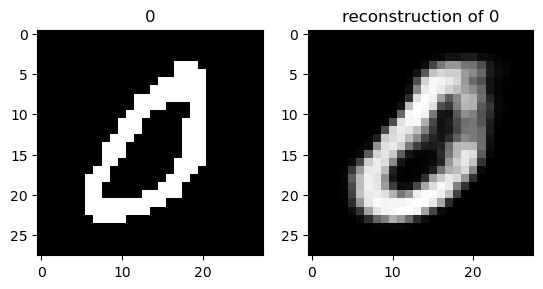

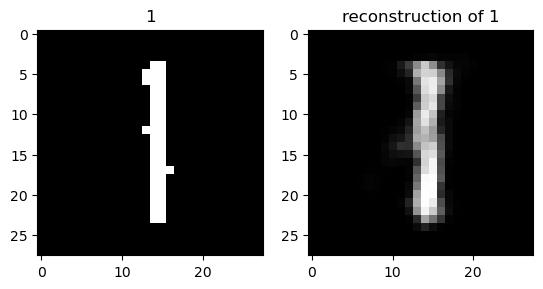

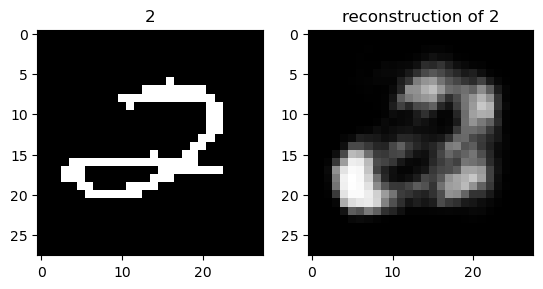

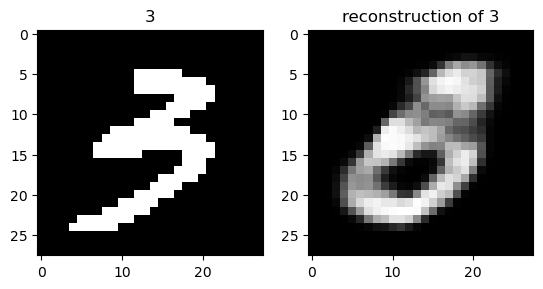

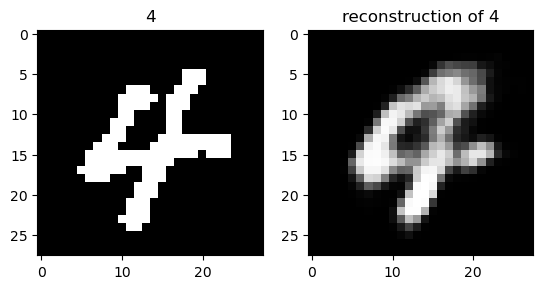

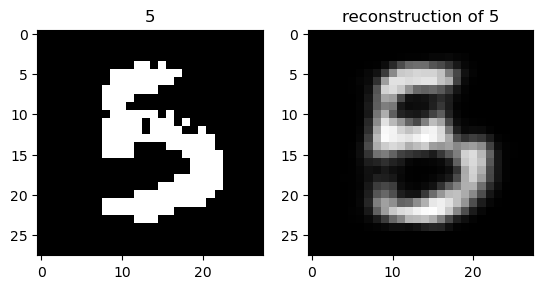

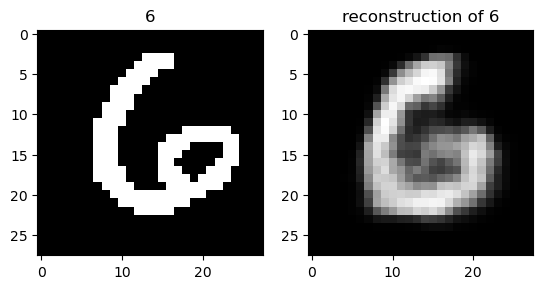

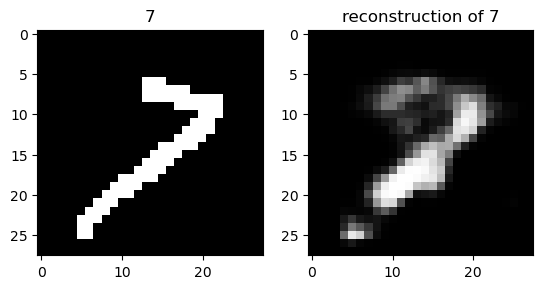

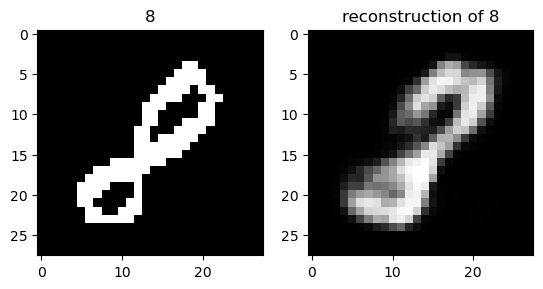

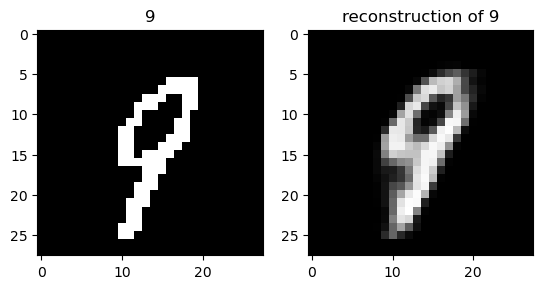

In [22]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(i)
    ax2.set_title("reconstruction of "+ str(i))
    ax1.imshow(x_sample[i].reshape(28,28), cmap='gray')
    ax2.imshow(x_sample_encoded[i].reshape(28,28), cmap='gray')
    plt.show()

It can be noted that for some number the reconstruction achieved a very good result such as 1, 4, 5, 6 and 9. If we see 0, it can be noted that the top right part is fading in favor of some connection inside that make the image vaguely resemble a 6. 2 is almost unrecognizable. 3 has become some mixture of 6 and 8. 7 is still recognizable although has almost lost the top part. 8 has become some weird klein-bottle-shaped symbol, but it still resemble the original image.

### Personal notes

Different combination of hyperparameters and/or using an optimization technique such as momentum descent could yield a better performing RBM, a model selection phase is advised. 